## Parsing


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
https = "https://stopgame.ru/news"

In [ ]:
links = [https + 'data/' + str(x) for x in range(57137, 58137)]
#58037 58255

In [ ]:
from tqdm import tqdm # чтобы знать, сколько еще ждать

In [ ]:
map = list()

In [ ]:
import time

In [ ]:
for i, link in enumerate(tqdm(links)):
  page = requests.get(link)
  time.sleep(0.1)
  if page.ok:
    data = BeautifulSoup(page.text, "html.parser")

    title=data.h1.text
    p_h3_tags = [tag.text.strip() for tag in data.find_all(['p', 'h3']) if not tag.find_parent('div', {'data-reactssr': True})]
    text = " ".join(p_h3_tags)

    #tags = []
    #for t in data.find_all("div", attrs = {"class" : "_tags__wrapper_1c0t7_1"})[0].find_all("a"):
      #tags.append(t.get_text())
    tags_1 = [tags.text.strip() for tags in data.find_all("div", attrs = {"class" : "_tags__wrapper_1c0t7_1"})[0].find_all("a")]
    tags = ", ".join(tags_1)
    if len(data.find_all('span', attrs={'class' : '_date_1c0t7_537 _date--full_1c0t7_1'})) > 0:
      time_ = data.find_all('span', attrs={'class' : '_date_1c0t7_537 _date--full_1c0t7_1'})[0].get_text()
    else:
      time_ = '-'

    if len(data.find_all('div', attrs={'class' : '_bottom-info_1c0t7_588'})) > 0:
      author = data.find_all('div', attrs={'class' : '_bottom-info_1c0t7_588'})[0].find_all('span')[0].get_text()
    else:
      author = '-'

    map.append([title, author, time_, text, tags])

100%|██████████| 1000/1000 [16:42<00:00,  1.00s/it]


In [ ]:
from google.colab import files
import pandas as pd

df = pd.DataFrame(data=map, columns=['title', 'author', 'time_', 'text', 'tags'])
df['time_'] = df['time_'].str.replace('\n', '')
df['tags'] = df['tags'].str.replace('\n', '')
df['text'] = df['text'].str.replace("\xa0", " ")
df['main_tag'] = df['tags'].str.split(',').str[0]
gameNews = df.to_excel('GameNews1.xlsx')
gameNews_csv = df.to_csv('GameNews1.csv')

In [ ]:
files.download('GameNews1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('GameNews1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,title,author,time_,text,tags,main_tag
0,"Осенью выйдет El Paso, Elsewhere — сверхъестес...",Руслан Присекин,22 февраля,"Нынче подражать Max Payne немодно, но студии S...","PC, Xbox Series X | S, Xbox One",PC
1,Патч для ПК-версии Wild Hearts улучшает произв...,Андрей Маковеев,22 февраля,Охотничий боевик Wild Hearts страдает от багов...,PC,PC
2,На EVO 2023 будут соревнования по Street Fight...,Руслан Присекин,22 февраля,В этом году файтинговый турнир EVO (Evolution ...,Индустрия,Индустрия
3,Игроки провели в Hogwarts Legacy больше 267 ми...,Александр Кудрявцев,22 февраля,Журналистка издания Variety пообщалась с предс...,"PC, PlayStation 5, Xbox Series X | S",PC
4,Пан или пропал — разработчик Ori о следующей и...,Андрей Маковеев,22 февраля,"Moon Studios, ответственная за дилогию метроид...",Индустрия,Индустрия
...,...,...,...,...,...,...
992,Fortnite добавили в олимпийские соревнования к...,Александр Кудрявцев,5 мая,"Международный олимпийский комитет объявил, что...",Киберспорт,Киберспорт
993,Почти 40 % игроков Hunt: Showdown не сделали н...,Александр Кудрявцев,6 мая,Генеральный менеджер франшизы Hunt в Crytek Дэ...,"PC, PlayStation 5, PlayStation 4, Xbox Series ...",PC
994,EVE Online отметит 20-летие фейерверком и ново...,Александр Кудрявцев,6 мая,"Сегодня, 6 мая, компания CCP Games празднует 2...",PC,PC
995,Sony закрывает внутреннюю студию PixelOpus,Александр Кудрявцев,6 мая,"Dear friends, our PixelOpus adventure has come...","PlayStation 5, Индустрия",PlayStation 5


##Vectorization

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

from google.colab import files
files.upload()

In [ ]:
df = pd.read_excel('GameNews1.xlsx', usecols=[4, 6])

In [ ]:
df

,text,main_tag
0,"Нынче подражать Max Payne немодно, но студии S...",PC
1,Охотничий боевик Wild Hearts страдает от багов...,PC
2,В этом году файтинговый турнир EVO (Evolution ...,Индустрия
3,Журналистка издания Variety пообщалась с предс...,PC
4,"Moon Studios, ответственная за дилогию метроид...",Индустрия
...,...,...
992,"Международный олимпийский комитет объявил, что...",Киберспорт
993,Генеральный менеджер франшизы Hunt в Crytek Дэ...,PC
994,"Сегодня, 6 мая, компания CCP Games празднует 2...",PC
995,"Dear friends, our PixelOpus adventure has come...",PlayStation 5


In [ ]:

news = np.array(df[df.keys()[0]])
tags = np.array(df[df.keys()[1]])

In [ ]:

unique, counts = np.unique(tags, return_counts=True)

result = np.column_stack((unique, counts))
print (result)
print(len(result))

[['Nintendo Switch' 18]
 ['PC' 646]
 ['PlayStation 4' 2]
 ['PlayStation 5' 59]
 ['Steam Deck' 5]
 ['VR' 4]
 ['Xbox Series X | S' 12]
 ['Индустрия' 198]
 ['Киберспорт' 1]
 ['Кино' 37]
 ['Мобильные' 13]
 ['Социальные' 1]
 ['Фановые' 1]]
13


In [ ]:
!pip install pymorphy2
!pip uninstall umap
!pip install umap-learn

In [ ]:
import re
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import pymorphy2
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
modelvec = 'drive/MyDrive/araneum_upos_skipgram_300_2_2018.vec'

Mounted at /content/drive


In [ ]:
model_w2v = KeyedVectors.load_word2vec_format(modelvec)
index2word_set = set(model_w2v.index_to_key)

In [ ]:

conv_pos = {'ADJF':'ADJ', 'ADJS':'ADJ', 'ADV':'ADV', 'NOUN':'NOUN',
            'VERB':'VERB', 'PRTF':'ADJ', 'PRTS':'ADJ', 'GRND':'VERB'}

tmp_dict = {} # Кеш значимых слов.
nones = {} # Кеш незначимых слов.

morph = pymorphy2.MorphAnalyzer()

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy(text, need_pos=True):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        # Если токен уже был закеширован, быстро возьмем результат из него.
        if t in tmp_dict.keys():
            words.append(tmp_dict[t])
        # Аналогично, если он в кеше незначимых слов.
        elif t in nones.keys():
            pass
        # Слово еще не встретилось, будем проводить медленный морфологический анализ.
        else:
            pv = morph.parse(t)
            if pv[0].tag.POS != None:
                if pv[0].tag.POS in conv_pos.keys():
                    if need_pos:
                        word = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                    else:
                        word = pv[0].normal_form
                    # Отправляем слово в результат, ...
                    words.append(word)
                    # ... и кешируем результат его разбора.
                    tmp_dict[t] = word
                else:
                    # Для незначимых слов можно даже ничего не хранить. Лишь бы потом не обращаться к морфологии.
                    nones[t] = ""

    return words

##Своя модель(не смотреть)


In [ ]:
sci_sentences = []
for text in tqdm(df.text):
    sci_sentences.append(normalizePymorphy(text))

100%|██████████| 997/997 [00:00<00:00, 1083.82it/s]


In [ ]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 128  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 4     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна
downsampling = 1e-3 # внутренняя метрика модели

model_our_sci = Word2Vec(sci_sentences, workers=num_workers, vector_size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

CPU times: user 925 ms, sys: 7.83 ms, total: 933 ms
Wall time: 798 ms


In [ ]:
model_our_sci.wv.most_similar('игра_NOUN')

[('версия_NOUN', 0.9998277425765991),
 ('год_NOUN', 0.9998193383216858),
 ('выпустить_VERB', 0.9998141527175903),
 ('конец_NOUN', 0.9998036623001099),
 ('магазин_NOUN', 0.9997909069061279),
 ('дополнение_NOUN', 0.9997873902320862),
 ('появиться_VERB', 0.9997861385345459),
 ('консоль_NOUN', 0.9997827410697937),
 ('выход_NOUN', 0.9997746348381042),
 ('страница_NOUN', 0.9997734427452087)]

In [ ]:
# Размер проанализированного корпуса
model_our_sci.corpus_total_words

66931

##-продолжение

In [ ]:
def text_to_vec(text):
    text_vec = np.zeros((model_w2v.vector_size,), dtype="float32")
    n_words = 0

    for word in normalizePymorphy(text):
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model_w2v[word])

    if n_words != 0:
        text_vec /= n_words
    return text_vec

In [ ]:

w2v_vectors = [text_to_vec(text) for text in news]

umap_news = umap.UMAP()
umaped_vct = umap_news.fit_transform(w2v_vectors)

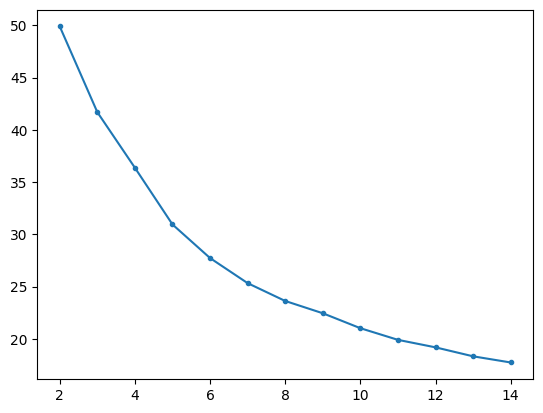

In [ ]:
X = umaped_vct #w2v_vectors

#Метод локтя
crit = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    crit.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 15), crit, marker='.')
plt.show()

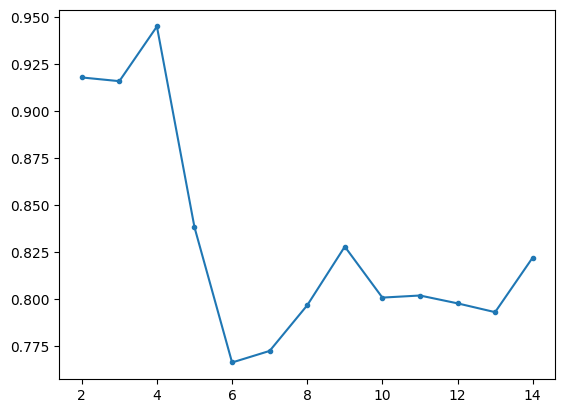

In [ ]:
#Оценка Дэвиса-Болдуина
crit_db = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    crit_db.append(davies_bouldin_score(X, kmeans.labels_))

plt.plot(range(2, 15), crit_db, marker='.')
plt.show()

In [ ]:
best_number = 6

#n_clusters - число кластеров (центров), n_init - количество срабатываний алгоритма с разными координатами центров (алгоритм чувствителен к выбору центров, поэтому нужно его усреднять)
#random_state - работает с n_init следующим образом: из равномерного распределения векторов берутся n_init * n_clusters центров и вот уже эти вектора детерменированы (одни и те же с каждым запуском)
kmeans = KMeans(n_clusters=best_number, random_state=1, n_init='auto').fit(X)

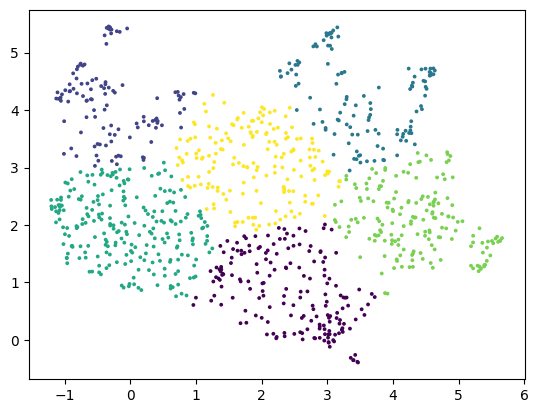

In [ ]:
plt.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=kmeans.labels_)

In [ ]:
adjusted_rand_score(kmeans.labels_, tags)

0.1058678442657296

## Классификация

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

result = np.column_stack((unique, counts))
print (result)

[[  0 180]
 [  1 110]
 [  2 121]
 [  3 238]
 [  4 175]
 [  5 173]]


In [ ]:

Y = []

for i, a in enumerate(X):
    if kmeans.labels_[i]==1:
        Y.append(1.0)
    else:
        Y.append(0.0)

In [ ]:
X_ = np.array(X)

In [ ]:
#Делим данные на обучающую и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y, test_size=0.2)

print(X_train.shape[0], 'train', X_test.shape[0], 'test')

797 train 200 test


In [ ]:
#Измеряем точность (accuracy) алгоритма для разного количества ближайших соседей (в методе KNN)
def calc_prec(y_hat2, y_test):
    prec=0
    for i, j in zip(y_hat2, y_test):
        if i==j:
            prec+=1
    prec/=len(y_test)
    return prec

prec = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, Y_train)
    y_hat2=knn.predict(X_test)
    prec.append(calc_prec(y_hat2, Y_test))

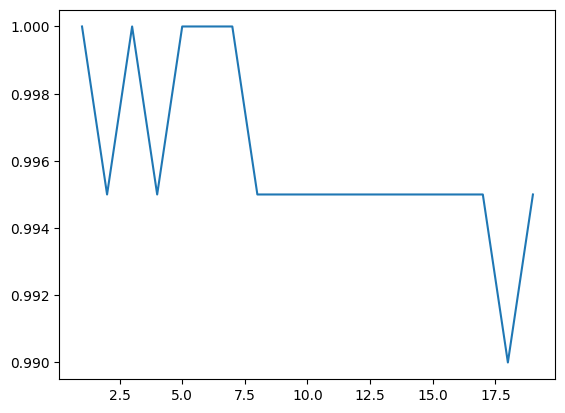

In [ ]:
#accuracy
plt.plot(range(1, 20), prec);

Confusion matrix, without normalization
[[178   0]
 [  1  21]]


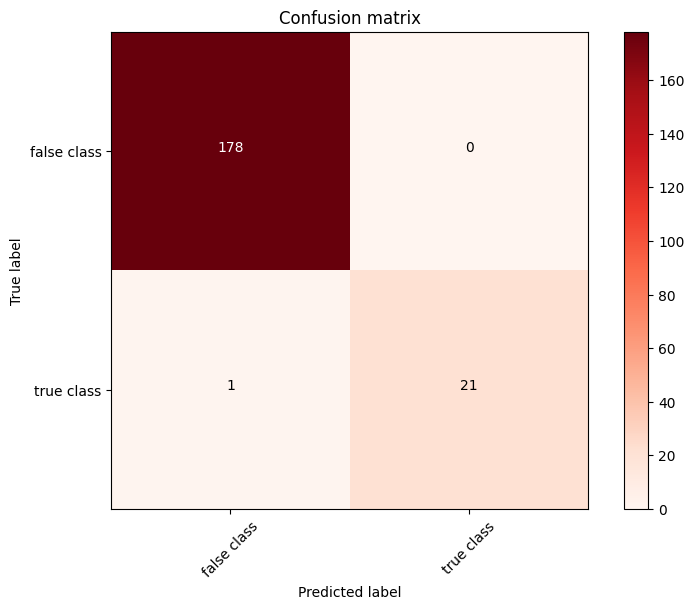

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 10}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, knn.predict(X_test))
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['false class', 'true class'],
                      title='Confusion matrix')
plt.show()

In [ ]:
from sklearn. metrics import f1_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[22, 178])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[21, 1, 0, 178])

#calculate F1 score
f1_score(actual, pred)

0.9767441860465117